# **Importing dependencies**

In [3]:
import numpy as np
import pandas as pd


In [5]:
# Loading The Data
placement = pd.read_csv('/content/placement.csv')


In [6]:
placement = placement.iloc[:,1:]

In [7]:
placement.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


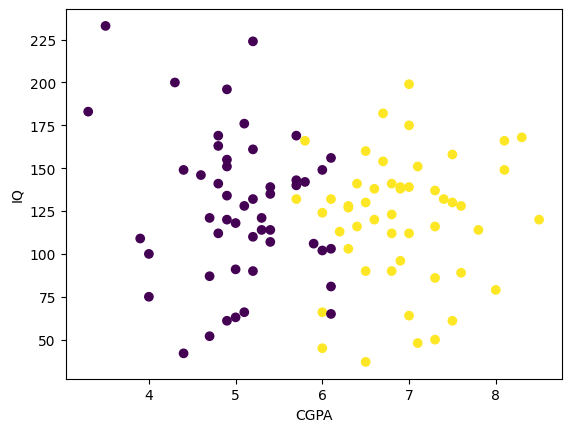

In [8]:
import matplotlib.pyplot as plt

plt.scatter(placement['cgpa'], placement['iq'], c=placement['placement'])
plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.show()


In [9]:
X = placement.iloc[:,0:2]
y = placement.iloc[:,-1]

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1)

# **Standarization**

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
standarized_X = scaler.transform(X_train)
standarized_X_test = scaler.transform(X_test)

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
clf = LogisticRegression()

In [14]:
# Model Training
clf.fit(X_train, y_train)

LogisticRegression()

In [21]:
y_pred = clf.predict(X_test)

In [22]:
y_test


34    0
48    1
74    1
99    1
58    1
73    0
76    0
93    1
92    0
94    0
Name: placement, dtype: int64

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
accuracy_score(y_test, y_pred)

1.0

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Axes: >

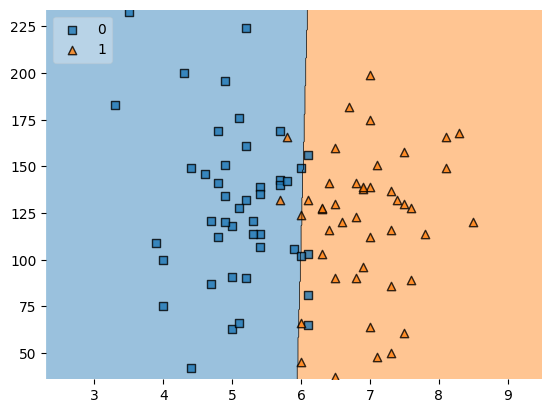

In [27]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train.values, y_train.values, clf=clf, legend=2)

In [28]:
import pickle

# Save the trained model to a file
with open('placement_model.pkl', 'wb') as f:
    pickle.dump(clf, f)
